Kornpob Bhirombhakdi

kbhirombhakdi@stsci.edu

# Description
In this notebook, after trace and wavelength was computed and saved in ./savefolder/saveprefix_trace.csv, we continue here to make a 2D cutout, which can be used further and simplify the reduction routine. hstgrism.cutout2d.Cutout2D is the class to handle this task.

In this demo, we still use a G102 grism image from [MAST](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html) (rootname: iab901ekq), and the trace.csv produced from earlier steps.

# Quick Walkthrough
- Import packages. Note that hstgrism.container.Container is required for saving outputs.
- Set up required parameters: tbox, bbox, image, and container. Note: we use trace.csv produced from earlier steps to initiate this process.
- Instantiate hstgrism.cutout2d.Cutout2D object, compute, and save.
- Last, we plot and save using show_bbox.


In [1]:
from hstgrism.container import Container
from hstgrism.cutout2d import Cutout2D
from hstgrism.show_bbox import show_bbox
import pandas as pd
from astropy.io import fits


In [2]:
saveprefix = 'testprefix'
savefolder = 'testfolder'
plotformat = 'pdf'
overwrite = False

container_params = {'saveprefix':saveprefix,
                    'savefolder':savefolder,
                    'plotformat':plotformat,
                    'overwrite':overwrite
                   }
containerobj = Container(**container_params)


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder testfolder already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)


In [3]:
gfile = ('/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901ekq/iab901ekq_flt.fits',1)
tfile = './testfolder/testprefix_trace.csv'
tdata = pd.read_csv(tfile)
xg = tdata.xh + tdata.xyref[0]
yg = tdata.yh + tdata.xyref[1]
halfdy = 20

tbox = {'xg':xg,'yg':yg,'halfdyup':halfdy,'halfdylow':halfdy}
bbox={'padxleft': 15, 'padxright': 15, 'padyup': 15, 'padylow': 15}
image = fits.open(gfile[0])[gfile[1]].data
do_mask = True


cutoutobj = Cutout2D(tbox,bbox,image,containerobj)
cutoutobj.compute(do_mask)
cutoutobj.save()


Save ./testfolder/testprefix_tbox.csv
Save ./testfolder/testprefix_bbox.csv
Save ./testfolder/testprefix_bbcorner.csv
Save ./testfolder/testprefix_cutout.fits
Save ./testfolder/testprefix_mask.fits


# show_bbox

Save ./testfolder/testprefix_bbox.pdf


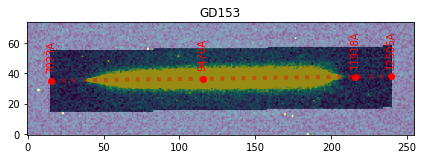

In [4]:
show_bbox(cutoutdata=cutoutobj.cutout,
          objname='GD153',
          maskdata=cutoutobj.mask,
          do_trace=True,
          xcut=xg - cutoutobj.bbcorner['bb0x'],
          ycut=yg - cutoutobj.bbcorner['bb0y'],
          ww=tdata.ww,
          save=True,container=containerobj
         )
